Test Phase4_3d file

In [1]:
# install anaconda: https://www.anaconda.com/products/individual
# if use Visual Studio Code, install python extension and select the python interpreter that includes anaconda
# install micropip: https://pypi.org/project/micropip/. You can also run anaconda prompt and type "pip install micropip"
import numpy as np
import micropip
await micropip.install("scipy")

In [2]:
from Phase4_trace_3d import Phase4_trace_3d
from generateTestPositions import generateTestPositions
# Cell 4
# Testing with dummy data

# Input conditions
initial_positions = [0, 0, 0]
noise = 1e-3
theta_degrees = 1.8
rev = 5  # revolutions of camera for the entire process
NOS = int(rev * 360 / theta_degrees)
NOS_per_section = 150  # must be larger than 5 to satisfy equations
camera_speed = 0.5  # in Hz or revolution per second
SRD = 1  # m, Source-Reference Distance
RDD = 1  # m, Reference-Detector (screen) Distance
radius = 1

method = 'acceleration'
dataPiling = 'serial'

# Auto-calculations of the rest of the parameters derived from the setting above
delta_T = camera_speed * theta_degrees / 360
shots_per_second = 1 / delta_T

# Define the velocity function
v = lambda t: [0.9 * np.sin(t), 0.9 * np.cos(t), 1]

# Pack conditions into a list
conditions = [noise, delta_T, NOS, theta_degrees, NOS_per_section, SRD, RDD,method,dataPiling]

# Generate test positions
xz_proj, real_positions = generateTestPositions(v, initial_positions, conditions)

In [3]:
# Print the first few rows of the generated data
print("xz_proj:")
print(xz_proj[:])
print("real_positions:")
print(real_positions[:])

xz_proj:
[[ 4.30192257e-04  3.99343321e-04]
 [ 6.82169983e-05  5.26432716e-03]
 [-4.09155001e-04  1.00218602e-02]
 ...
 [ 1.83972532e+00  2.94271503e+00]
 [ 1.92557056e+00  3.03732425e+00]
 [ 2.01268201e+00  3.13888835e+00]]
real_positions:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.81249854e-06 2.24999766e-03 2.50000000e-03]
 [1.12499766e-05 4.49998125e-03 5.00000000e-03]
 ...
 [1.61696933e+00 5.44017450e-01 2.49250000e+00]
 [1.61832713e+00 5.42223328e-01 2.49500000e+00]
 [1.61968044e+00 5.40425818e-01 2.49750000e+00]]


In [4]:
# Import the function directly from the module
from Phase4_trace_3d import Phase4_trace_3d

# Then you can call it just by its name:
estimated_positions = Phase4_trace_3d(initial_positions, conditions, v, xz_proj)

NOS:  1000
NOS_per_Section:  150
normal called
normal called
normal called
normal called
normal called
normal called
prev 906
proj_index 850
last positions [[1.37289221 0.70643923 2.01832697]
 [1.37356196 0.7061753  2.01853132]
 [1.37417885 0.70591847 2.01868603]
 [1.37474289 0.70566873 2.01879111]
 [1.37525406 0.70542609 2.01884654]
 [1.37571237 0.70519054 2.01885234]
 [1.37611782 0.7049621  2.01880849]
 [1.37647041 0.70474075 2.018715  ]
 [1.37677014 0.70452649 2.01857188]
 [1.37701701 0.70431934 2.01837911]
 [1.37721102 0.70411928 2.0181367 ]
 [1.37735217 0.70392632 2.01784466]
 [1.37744046 0.70374045 2.01750297]
 [1.37747589 0.70356168 2.01711164]
 [1.37745846 0.70339001 2.01667068]
 [1.37738817 0.70322543 2.01618007]
 [1.37726502 0.70306795 2.01563982]
 [1.37708901 0.70291757 2.01504994]
 [1.37686013 0.70277429 2.01441041]
 [1.3765784  0.7026381  2.01372124]
 [1.37624381 0.70250901 2.01298243]
 [1.37585636 0.70238701 2.01219399]
 [1.37541604 0.70227211 2.0113559 ]
 [1.37492287 0.7

In [5]:
print('estimated positions: \n',estimated_positions)
print('real positions: \n',real_positions)

estimated positions: 
 [[-0.02546043  0.21520501  0.00367971]
 [-0.02717263  0.21180685  0.00622246]
 [-0.02883948  0.20846744  0.00876758]
 ...
 [-1.54195773 -0.74918007  2.49025436]
 [-1.54310878 -0.74716328  2.49197571]
 [-1.54424782 -0.7451335   2.49368118]]
real positions: 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.81249854e-06 2.24999766e-03 2.50000000e-03]
 [1.12499766e-05 4.49998125e-03 5.00000000e-03]
 ...
 [1.61696933e+00 5.44017450e-01 2.49250000e+00]
 [1.61832713e+00 5.42223328e-01 2.49500000e+00]
 [1.61968044e+00 5.40425818e-01 2.49750000e+00]]


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def Phase4Graph(real_positions, estimated_positions, conditions, v, f2):
    noise, delta_T, NOS, theta_degree, N, SRD, RDD, method, dataPiling = conditions
    
    # Ensure that real_positions and estimated_positions are the same length
    real_positions = real_positions[:len(estimated_positions)]
    
    fig = plt.figure(f2, figsize=(10, 8), dpi=300)
    
    ax1 = fig.add_subplot(111, projection='3d')
    
    ax1.plot(real_positions[:, 0], real_positions[:, 1], real_positions[:, 2], 'r', markersize=10)
    ax1.plot(estimated_positions[:, 0], estimated_positions[:, 1], estimated_positions[:, 2], 'b', linewidth=2)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Real Positions vs Estimated Positions in 3D')
    ax1.legend(['Real Positions', 'Estimated Positions'])
    
    distances = np.linalg.norm(real_positions - estimated_positions, axis=1)
    min_val, min_idx = np.min(distances), np.argmin(distances)
    max_val, max_idx = np.max(distances), np.argmax(distances)
    
    ax1.text(*real_positions[min_idx], f'Min ({min_idx}): {real_positions[min_idx]}', color='r')
    ax1.text(*estimated_positions[min_idx], f'Min ({min_idx}): {estimated_positions[min_idx]}', color='b')
    ax1.text(*real_positions[max_idx], f'Max ({max_idx}): {real_positions[max_idx]}', color='r')
    ax1.text(*estimated_positions[max_idx], f'Max ({max_idx}): {estimated_positions[max_idx]}', color='b')
    
    print(f'Noise: {noise}\nMin Distance: {min_val}\nMax Distance: {max_val}\nNumber of Shots: {NOS}\nRotation: {theta_degree}\nTime Between Shots: {delta_T}\nNOS Per Section: {N}\nMethod: {method}\nData Piling: {dataPiling}')
    
    v_str = str(v).replace('<function ', '').replace(' at 0x' + hex(id(v))[2:] + '>', '')
    
    print(f'True velocity:\n{v_str}\nt is time elapsed')
    
    plt.show()


Noise: 0.001
Min Distance: 0.04270455436691884
Max Distance: 3.4151309408793113
Number of Shots: 1000
Rotation: 1.8
Time Between Shots: 0.0025
NOS Per Section: 150
Method: acceleration
Data Piling: serial
True velocity:
<lambda>
t is time elapsed


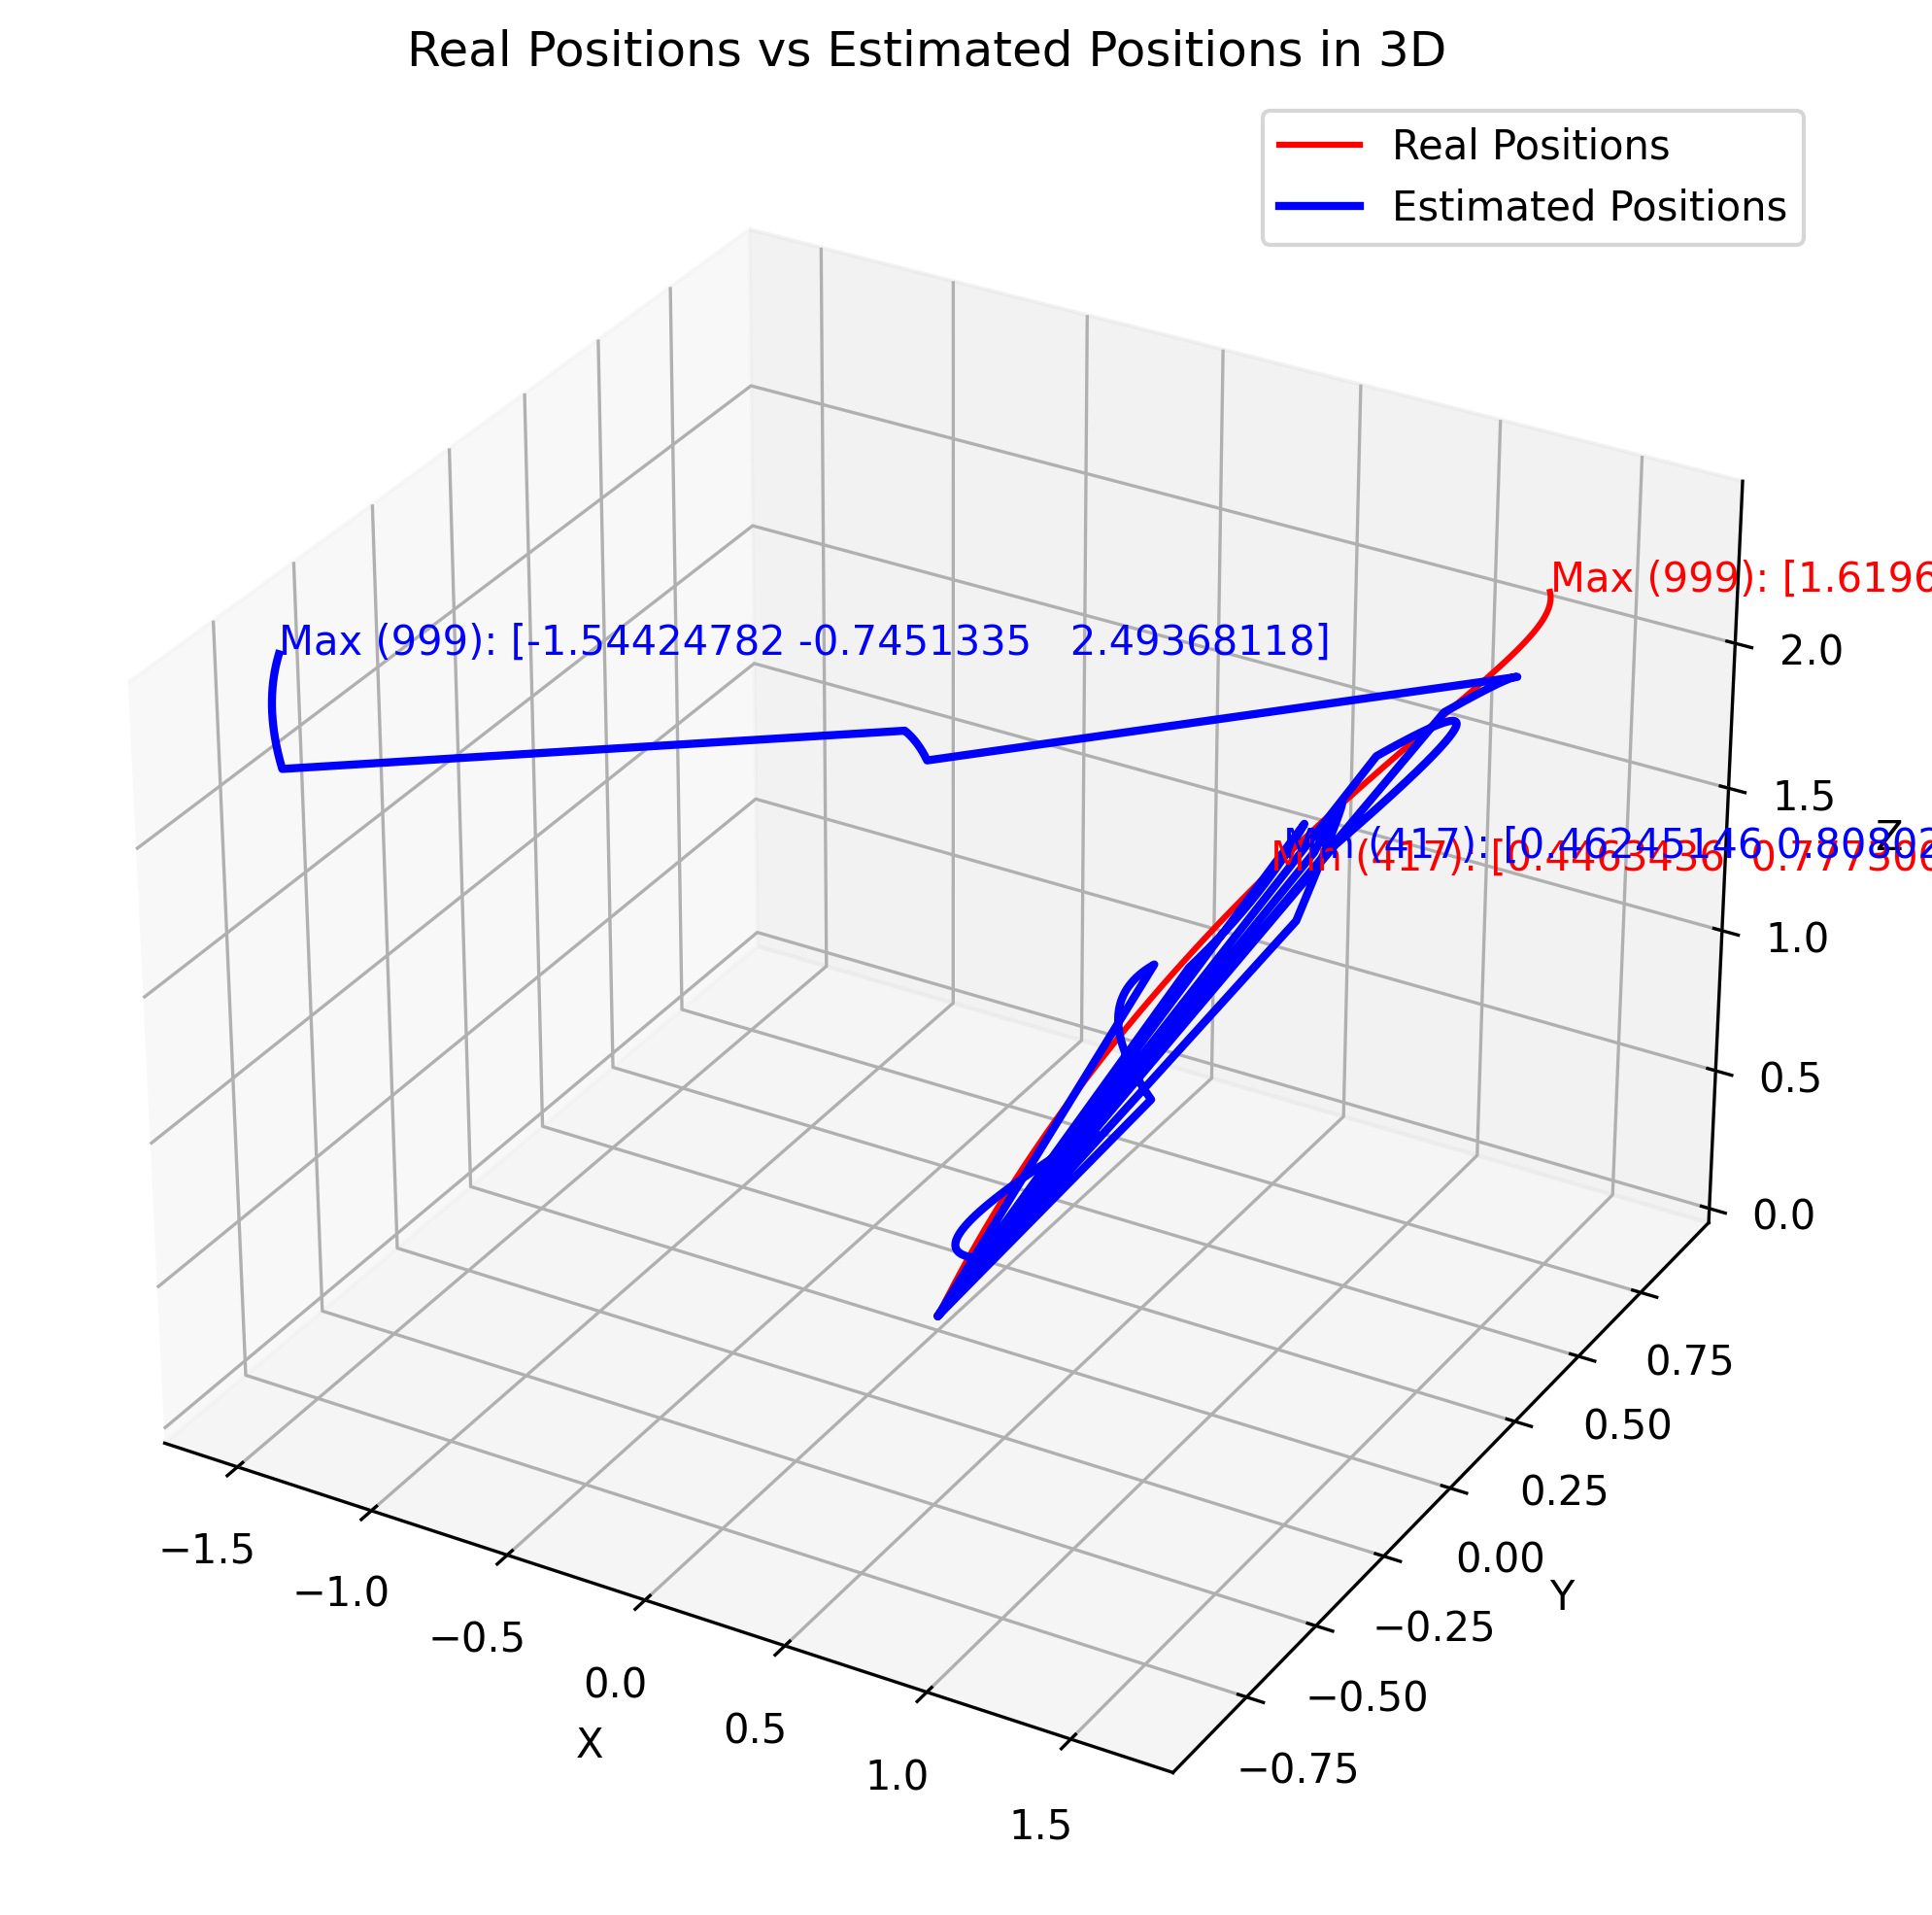

In [7]:
f2 = 0
Phase4Graph(real_positions, estimated_positions, conditions, v, f2)